<a href="https://colab.research.google.com/github/JedWojtowicz/MAD_jw/blob/main/JW_lab_12_PD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 12. Model regresyjny

In [1]:
# import niezbędnych bibliotek
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

Dane, na których zaprezentowany zostanie przykład to dane z serwisu www.kaggle.com.

**Dataset:** https://www.kaggle.com/datasets/amrahhasanov23/otodom-pl-flat-prices-in-poland

In [2]:
!pip install kagglehub

In [3]:
import kagglehub

# plik pobiera się niestety bez podania ścieżki docelowej, więc zapewne będzie to jakiś folder tymczasowy
path = kagglehub.dataset_download("amrahhasanov23/otodom-pl-flat-prices-in-poland")

print("Ścieżka do pliku:", path)

100%|██████████| 179k/179k [00:00<00:00, 59.9MB/s]

Extracting files...
Ścieżka do pliku: /root/.cache/kagglehub/datasets/amrahhasanov23/otodom-pl-flat-prices-in-poland/versions/1


In [4]:
# deklarujemy stałą, która będzie niezmienna (to znowu taka umowa/konwencja), która wskazuje na ścieżkę do głównego
# katalogu z danymi dla tego notebooka
DATAPATH = './data'

import os

os.makedirs(DATAPATH, exist_ok=True)

In [8]:
# przeniesiemy plik do folderu z danymi, który utworzyliśmy wcześniej
import shutil

# zakładamy, że jest tam tylko jeden plik, więc listujemy folder i pobieramy pierwszą nazwę pliku
filename = os.listdir(path)[0]

shutil.move(os.path.join(path, filename), os.path.join(DATAPATH, filename))

'./data/Otodom_Flat_Listings.csv'

In [9]:
# sprawdzamy czy plik faktycznie się przeniósł
os.listdir(DATAPATH)

['Otodom_Flat_Listings.csv']

In [28]:
otodf = pd.read_csv(os.path.join(DATAPATH, filename))
otodf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2807 entries, 0 to 2806
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   2807 non-null   object 
 1   Price                   2664 non-null   float64
 2   Location                2806 non-null   object 
 3   Surface                 2807 non-null   float64
 4   Number_of_Rooms         2807 non-null   object 
 5   Floor                   2743 non-null   object 
 6   Finishing_Condition     2229 non-null   object 
 7   Heating                 2060 non-null   object 
 8   Parking_Space           1478 non-null   object 
 9   Balcony_Garden_Terrace  2102 non-null   object 
 10  Link                    2807 non-null   object 
 11  Voivodeship             2806 non-null   object 
 12  City                    2806 non-null   object 
dtypes: float64(2), object(11)
memory usage: 285.2+ KB


In [29]:
otodf_1 = otodf[['Surface', 'Price']]
otodf_1 = otodf_1.dropna()
otodf_1

,Surface,Price
0,47.00,415000.0
1,105.00,2499000.0
2,60.00,649000.0
3,78.30,2108000.0
4,49.20,450180.0
...,...,...
2802,34.00,525000.0
2803,61.18,829000.0
2804,50.00,830000.0
2805,66.47,699000.0


In [30]:
# 1. podział danych na 4 podzbiory
X = otodf_1['Surface']
y = otodf_1['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

**Zadanie 1**

Bazując na przykładzie z wykładu stwórz model regresji wielomianowej dla dwóch stworzonych tutaj modeli regresji liniowej. Porównaj wyniki.


Text(0, 0.5, 'Oś y')

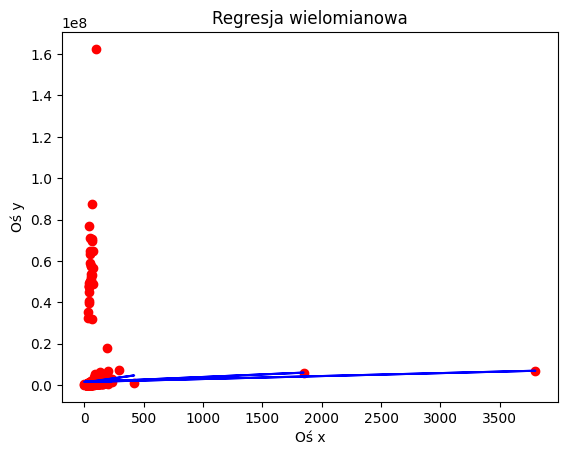

In [31]:
data = pd.DataFrame({"X":X_train,
                     "y":y_train})
sns.scatterplot(data=data, x="X", y="y")
X = data[['X']]
y = data[['y']]

polynomial_reg = PolynomialFeatures(degree = 6)
X_polynomial = polynomial_reg.fit_transform(X)

linear_reg = LinearRegression()
linear_reg.fit(X_polynomial, y)
predictions=linear_reg.predict(X_polynomial)

plt.scatter(X,y, color = 'red')
plt.plot(X, predictions, color = 'blue')
plt.title('Regresja wielomianowa')
plt.xlabel('Oś x')
plt.ylabel('Oś y')


**Zadanie 2**

Dodaj do zbioru danych cechę `Number of rooms` i sprawdź jak to wpływa na jakość modelu.

ConversionError: Failed to convert value(s) to axis units:        X
1893  4 
1324  2 
2065  2 
2428  3 
1593  3 
...   ..
1833  3 
809   2 
892   4 
1748  3 
2743  2 

[1998 rows x 1 columns]

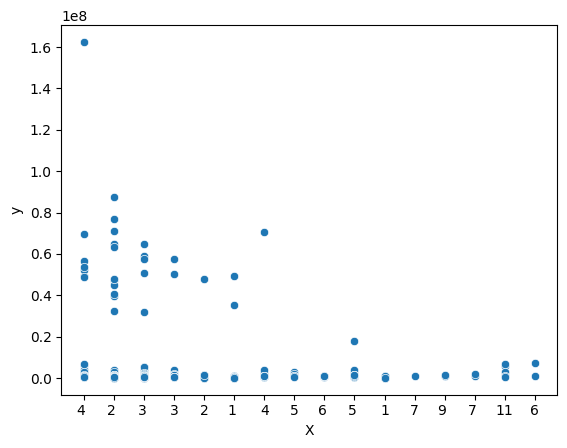

In [39]:
otodf_2 = otodf[['Surface', 'Price','Number_of_Rooms']]
otodf_2 = otodf_2.dropna()
otodf_2 = otodf_2.replace("więcej niż 10", '11')

X = otodf_2['Number_of_Rooms']
y = otodf_2['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
data = pd.DataFrame({"X":X_train,
                     "y":y_train})
sns.scatterplot(data=data, x="X", y="y")
X = data[['X']]
y = data[['y']]

polynomial_reg = PolynomialFeatures(degree = 6)
X_polynomial = polynomial_reg.fit_transform(X)

linear_reg = LinearRegression()
linear_reg.fit(X_polynomial, y)
predictions=linear_reg.predict(X_polynomial)

plt.scatter(X,y, color = 'red')
plt.plot(X, predictions, color = 'blue')
plt.title('Regresja wielomianowa')
plt.xlabel('Oś x')
plt.ylabel('Oś y')

**Zadanie 3**

Zakoduj cechę `Voivoideship` (one-hot, dummy ?) i wykorzystaj w zbiorze danych i ponownie sprawdź jaki to ma wpływ na model.


In [16]:
#kodowanie cechy Voivoideship za pomocą TERYT gdzie
Voivodeship_map = {"Dolnośląskie": 2, "Kujawsko-pomorskie": 4, "Lubelskie": 6,
                    "Lubuskie": 8, "Łódzkie":10,"Małopolskie":12,"Mazowieckie":14,
                    "Opolskie":16, "Podkarpackie":18,"Podlaskie":20,"Pomorskie":22,
                    "Śląskie":24,"Świętokrzyskie":26,"Warmińsko-mazurskie":28,
                    "Wielkopolskie":30,"Zachodniopomorskie":32}

otodf_3 = otodf[['Surface', 'Price','Voivodeship']]
otodf_3 = otodf_3.dropna()
otodf_3['Voivodeship'] = otodf_3['Voivodeship'].map(Voivodeship_map)
otodf_3

,Surface,Price,Voivodeship
0,47.00,415000.0,10
1,105.00,2499000.0,14
2,60.00,649000.0,8
3,78.30,2108000.0,32
4,49.20,450180.0,32
...,...,...,...
2802,34.00,525000.0,32
2803,61.18,829000.0,12
2804,50.00,830000.0,14
2805,66.47,699000.0,2


Text(0, 0.5, 'Oś y')

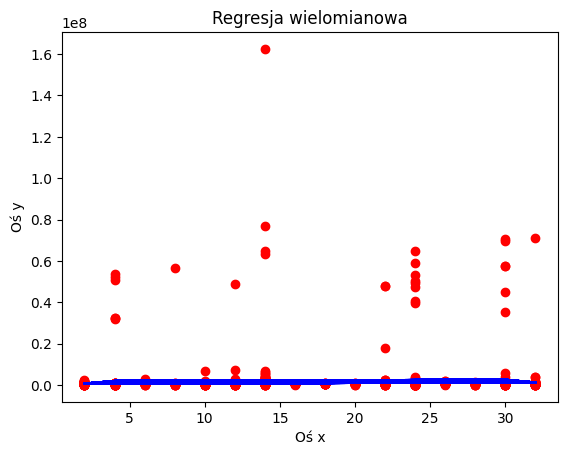

In [40]:
X = otodf_3['Voivodeship']
y = otodf_3['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
data = pd.DataFrame({"X":X_train,
                     "y":y_train})
sns.scatterplot(data=data, x="X", y="y")
X = data[['X']]
y = data[['y']]

polynomial_reg = PolynomialFeatures(degree = 6)
X_polynomial = polynomial_reg.fit_transform(X)

linear_reg = LinearRegression()
linear_reg.fit(X_polynomial, y)
predictions=linear_reg.predict(X_polynomial)

plt.scatter(X,y, color = 'red')
plt.plot(X, predictions, color = 'blue')
plt.title('Regresja wielomianowa')
plt.xlabel('Oś x')
plt.ylabel('Oś y')




**Zadanie 4** *

Dodaj kolejne cechy modelu zastanawiając się nad poprawnym ich zakodowaniem, tak aby poprawić jego jakość.

\* zadanie opcjonalne (może być brane pod uwagę w przypadku wątpliwości co do finalnej oceny).

### Przykład wielu powtórzeń tego samego eksperymentu (model regresji) i wyliczenie średnich wyników

In [ ]:
from tqdm import tqdm

X = otodf_1['Surface'].values.reshape(-1, 1)
y = otodf_1['Price']

iters = 1000
lin_reg = LinearRegression()
results = {'MAE': [], 'MSE': [], 'RMSE': [], 'R2': []}

for i in tqdm(range(1, iters + 1)):
    # data split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    # fit the model
    lin_reg.fit(X_train, y_train)
    predictions = lin_reg.predict(X_test)
    results['MAE'].append(mean_absolute_error(y_test, predictions))
    results['MSE'].append(mean_squared_error(y_test, predictions))
    results['RMSE'].append(np.sqrt(mean_squared_error(y_test, predictions)))
    results['R2'].append(r2_score(y_test, predictions))

# average of the results
for key, value in results.items():
    print(f'Average {key}: {np.mean(value)}')

In [ ]:
# usunięcie wartości odstających w kolumnie Surface

iters = 1000
lin_reg = LinearRegression()
results = {'MAE': [], 'MSE': [], 'RMSE': [], 'R2': []}

for i in tqdm(range(1, iters + 1)):
    # data split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

    # remove outliers
    q1 = np.percentile(X_train, 25)
    q3 = np.percentile(X_train, 75)
    iqr = q3 - q1
    # teraz progi dla wartości odstających
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    # ocinamy wartości odstające
    outliers_map = (X_train > upper) | (X_train < lower)
    outliers_map = outliers_map.flatten()
    # znak ~ oznacza negację
    X_train = X_train[~outliers_map]
    y_train = y_train[~outliers_map]


    # fit the model
    lin_reg.fit(X_train, y_train)
    predictions = lin_reg.predict(X_test)
    results['MAE'].append(mean_absolute_error(y_test, predictions))
    results['MSE'].append(mean_squared_error(y_test, predictions))
    results['RMSE'].append(np.sqrt(mean_squared_error(y_test, predictions)))
    results['R2'].append(r2_score(y_test, predictions))

# average of the results
for key, value in results.items():
    print(f'Average {key}: {np.mean(value)}')

In [ ]:
sns.histplot(results['MAE'], kde=True)

In [ ]:
# dodanie standaryzacji danych w kolumnie surface
from sklearn.preprocessing import StandardScaler, Normalizer

iters = 1000
lin_reg = LinearRegression()
results = {'MAE': [], 'MSE': [], 'RMSE': [], 'R2': []}

for i in tqdm(range(1, iters + 1)):
    # data split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    # data scaling or normalizing - choose only one at a time!
    # scaler = StandardScaler()
    normalizer = Normalizer()
    # scaler.fit(X_train)
    normalizer.fit(X_train)


    # fit the model
    lin_reg.fit(X_train, y_train)

    # scale test data
    # X_test = scaler.transform(X_test)
    X_test = normalizer.transform(X_test)

    predictions = lin_reg.predict(X_test)
    results['MAE'].append(mean_absolute_error(y_test, predictions))
    results['MSE'].append(mean_squared_error(y_test, predictions))
    results['RMSE'].append(np.sqrt(mean_squared_error(y_test, predictions)))
    results['R2'].append(r2_score(y_test, predictions))

# average of the results
for key, value in results.items():
    print(f'Average {key}: {np.mean(value)}')